<a href="https://colab.research.google.com/github/harshal306/Chest_Xray_Disease_Detection/blob/master/chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/harshal306/Chest_Xray_Disease_Detection.git

Cloning into 'Chest_Xray_Disease_Detection'...
remote: Enumerating objects: 5864, done.
remote: Counting objects: 100% (5864/5864), done.
remote: Compressing objects: 100% (5851/5851), done.
remote: Total 5864 (delta 14), reused 5857 (delta 10), pack-reused 0
Receiving objects: 100% (5864/5864), 1.13 GiB | 44.89 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Checking out files: 100% (5862/5862), done.


# New Section

In [0]:
!ls

Chest_Xray_Disease_Detection  sample_data


In [0]:
ls

chest_xray/  README.md


In [0]:
pwd

'/content/Chest_Xray_Disease_Detection/chest_xray/train'

In [0]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

In [0]:
TRAIN_DIR = "/content/Chest_Xray_Disease_Detection/chest_xray/train/data"
TEST_DIR = "/content/Chest_Xray_Disease_Detection/chest_xray/test/data"

In [0]:
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME =('normalvspneumonia-{}-{}.model'.format(LR,'6conv-basic'))

In [0]:
def label_img(img):
    
    word_label = img.split('.')[0][:6]
    
    if word_label == 'normal': return [1,0]
    
    elif word_label == 'pneumo': return [0,1]


In [0]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data


In [0]:
def process_test_data():
    i=0
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), i])
        i = i+1

    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data


In [122]:
train_data = create_train_data()
# If you have already created the dataset:
#train_data = np.load('train_data.npy')
test_data = process_test_data()

100%|██████████| 624/624 [00:04<00:00, 154.83it/s]


In [0]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

In [0]:
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32,2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [0]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [0]:
train = train_data[:-500]
test = train_data[-500:]


In [127]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]
print(Y)

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]
print(test_y)


[array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1,

In [128]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 369  | total loss: 0.11517 | time: 0.710s
| Adam | epoch: 005 | loss: 0.11517 - acc: 0.9601 -- iter: 4672/4716
Training Step: 370  | total loss: 0.11167 | time: 1.723s
| Adam | epoch: 005 | loss: 0.11167 - acc: 0.9594 | val_loss: 0.12537 - val_acc: 0.9540 -- iter: 4716/4716
--


In [0]:
model.save(MODEL_NAME)

100%|██████████| 624/624 [00:04<00:00, 151.01it/s]


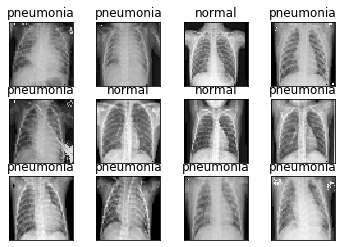

In [136]:
import matplotlib.pyplot as plt

# if you need to create the data:
test_data = process_test_data()
# if you already have some saved:
#test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # normal: [1,0]
    # pneumonia: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='pneumonia'
    else: str_label='normal'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()